In [2]:
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import scipy.optimize as sco
import scipy.stats as scs
%matplotlib inline

#### I. Create damped data points

In [3]:
np.random.seed(8301998) #1199
rn.seed(22)

In [4]:
ti = [rn.uniform(0,3*np.pi) for i in range(11)]
ti = np.sort(ti)
data = [np.sin(t)*np.e**(-t/10)+np.random.normal()*0.4-0.2 for t in ti] 
data = np.array(data)
#sort data (?)

In [5]:
data

array([-0.52745198,  0.43921407,  1.3561072 ,  0.6881534 ,  0.83021525,
       -0.2477418 ,  0.22530295,  0.44608057,  0.52389514,  0.01638416,
       -0.53976276])

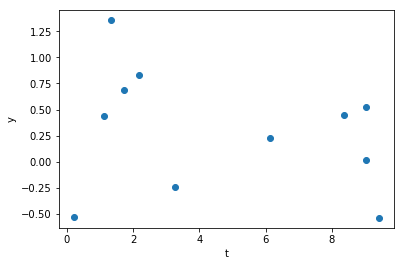

In [6]:
plt.plot(ti,data,'o')
plt.xlabel("t")
plt.ylabel("y")

#### II. Fit function

In [7]:
def fitfunc(t, a, om, phi, b):
    return (a*np.sin(om*t + phi)*np.e**(-b*t))

In [8]:
ydata, pcov = sco.curve_fit(fitfunc,ti,data)
print("a =", ydata[0], "om =",ydata[1], "phi =", ydata[2], "b =", ydata[3])

a = 1.02146023151 om = 1.09500952873 phi = -0.456432559261 b = 0.0268840511481


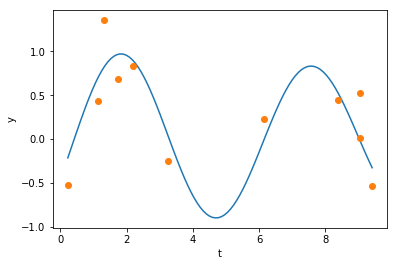

In [9]:
t = np.linspace(min(ti),max(ti),100)
y = fitfunc(t,*ydata)
plt.plot(t,y)
plt.plot(ti,data,'o')
plt.xlabel("t")
plt.ylabel("y")

#### III. Chi squared

\begin{equation}
\chi^2 = \frac{(Y_i - g(\vec{a}))^2}{\sigma_i^2}
\end{equation}

\begin{equation}
\vec{a} = [a,b,om,phi]
\end{equation}
Find: $\chi_o^2(\vec{a_o})$


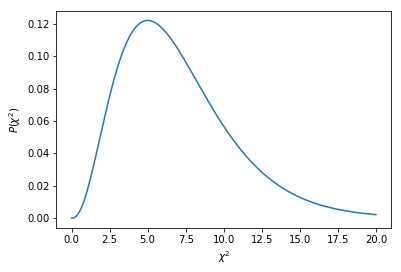

In [10]:
#x = np.linspace(scs.chi2.ppf(0.05, df),scs.chi2.ppf(0.95, df), 100)
x = np.linspace(0,20,10000)
plt.plot(x, scs.chi2.pdf(x, df=7))
plt.xlabel(r'$\chi^2$')
plt.ylabel(r'$P(\chi^2)$')

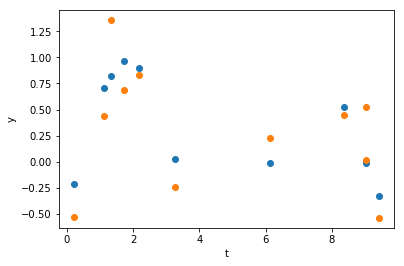

In [11]:
tn = np.linspace(0,max(ti),len(ti))
yy = fitfunc(ti, *ydata)
plt.plot(ti,yy,'o')
plt.plot(ti,data,'o')
plt.xlabel("t")
plt.ylabel("y")

In [39]:
interval = [scs.chi2.ppf(.05, df=7),scs.chi2.ppf(0.95, df =7),100]
interval

[2.1673499092980579, 14.067140449340167, 100]

In [52]:
def chisq(data,yy):
    s = sum(((data-yy)/np.std(data))**2)
    return s
Xochi = chisq(data,yy)#scs.chisquare(data,yy)[0]
Xochi 

3.2214284840368008

In [53]:
a = np.linspace(0,1.5,300)
b = np.linspace(-0.5,2.5,300)
S = np.empty([len(a),len(b)])
#Xc = np.empty(10000)
for i in range(len(a)):
    for j in range(len(b)):
        g = fitfunc(ti, a[i], ydata[1], ydata [2], b[j])
        Xchi = chisq(data,g)
        #Xc[j] = Xchi
        S[i,j] = scs.chi2.cdf((Xchi-Xochi),df=4)

array([ 1.02146023,  1.09500953, -0.45643256,  0.02688405])

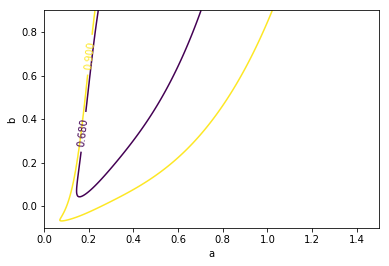

In [59]:
Q,R = np.meshgrid(a,b)
fig, ax = plt.subplots()
CS = ax.contour(Q,R,S, levels=[0.68,0.9])
ax.clabel(CS, CS.levels, inline=True)
plt.xlabel("a")
plt.ylabel("b")
ydata

In [55]:
om = np.linspace(0.5,1.5,300)
b = np.linspace(-0.1,0.9,300)
P1 = np.empty([len(a),len(b)])
#Xc1 = np.empty(100)
for i in range(len(om)):
    for j in range(len(b)):
        g = fitfunc(ti, ydata[0], om[i], ydata [2], b[j])
        Xchi1 = chisq(data,g)
        #Xc1[j] = Xchi
        P1[i,j] = scs.chi2.cdf((Xchi1-Xochi),df=4)

array([ 1.02146023,  1.09500953, -0.45643256,  0.02688405])

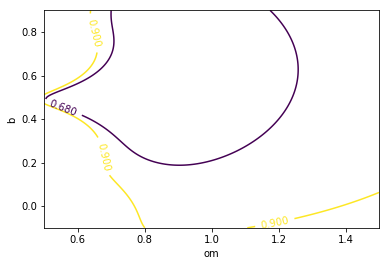

In [56]:
W,V = np.meshgrid(om,b)
fig, ax = plt.subplots()
CS = ax.contour(W,V,P1, levels=([0.68,0.9]))
ax.clabel(CS, CS.levels, inline=True)
plt.xlabel("om")
plt.ylabel("b")
ydata

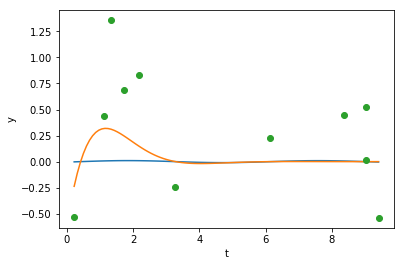

In [57]:
ya1 = fitfunc(t,0.01,ydata[1],ydata[2],.01)
ya2 = fitfunc(t,1.4,ydata[1],ydata[2],1)
plt.plot(t,ya1)
plt.plot(t,ya2)
plt.plot(ti,data,'o')
plt.xlabel("t")
plt.ylabel("y")

In [58]:
np.std(data-yy)

0.30109451226915473